# 1-Libraries

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
%matplotlib inline

# 2-Normalization

In [23]:
class Normalization():
    def __init__(self, data):
        self.min = data.min(axis=0)
        self.max = data.max(axis=0)
        self.data = data
        
    def transform(self, d):
        return (d - self.min) / (self.max - self.min)
    
    def inversed_transform(self, d):
        return (d * (self.max - self.min)) + self.min
        

# 3-Model

In [24]:
class LinearRegression():
    def __init__(self, x1_train, x2_train,x3_train, y_train, w_in1=0, w_in2=0,w_in3=0, b_in=0, alpha=0.3, epoch=3000):
        self.x1_train = x1_train
        self.x2_train = x2_train
        self.x3_train = x3_train
        self.y_train = y_train
        self.w_in1 = w_in1
        self.w_in2 = w_in2
        self.w_in3 = w_in3
        self.b_in = b_in
        self.alpha = alpha
        self.epoch = epoch
        self.cost_list = list()
    
    def fit(self):
        self.gradient_descent(self.w_in1, self.w_in2,self.w_in3, self.b_in, self.x1_train, self.x2_train, self.x3_train, self.y_train, self.alpha, self.epoch)
        return self.b, self.w1, self.w2,self.w3
    
    
    def gradient_descent(self,w1,w2,w3, b, x1,x2,x3, y, alpha, iter_num):

        for i in range(iter_num):
            f = (w1*x1) + (w2*x2)+ (w3*x3) + b
            
            dw1 = ((f-y)*x1).sum()/len(x1)
            dw2 = ((f-y)*x2).sum()/len(x2)
            dw3 = ((f-y)*x3).sum()/len(x3)
            db = sum_b = (f-y).sum()/len(x1)
            
            w1 = w1 - alpha * dw1
            w2 = w2 - alpha * dw2
            w3 = w3 - alpha * dw3
            b = b - alpha * db
            cost = np.power((w1*x1 + w2*x2 + w3*x3 + b) -y,2).mean()
            
            if(i % 1000 == 0):
                print(f'Epoch:{i} -> cost={cost}')
                self.cost_list.append(cost)
                
        self.b = b
        self.w1 = w1
        self.w2 = w2
        self.w3 = w3
        return b,w1,w2,w3
        
    def draw_plot(self):
        plt.scatter(self.x1_train, self.y_train,  color='blue')
        plt.plot(self.x1_train, self.w1 * self.x1_train + self.b, '-r')
        print(f'b:{self.b}\nw1:{self.w1}\nw2:{self.w2}\nw3:{self.w3}')
        
    def mse(self):
        y_pred = self.w1*self.x1_train + self.w2*self.x2_train+ self.w3*self.x3_train + self.b
        self.mse = mean_squared_error(y_pred, self.y_train)
        print("MSE of train set is : ",self.mse)
        
        
    def validation(self,cv_x1,cv_x2,cv_x3,cv_y):
        validation = self.w1*cv_x1 + self.w2*cv_x2 + self.w3*cv_x3 + self.b
        print("MSE of validation is : ",mean_squared_error(validation, cv_y))
        return validation

    def draw_cost(self):
        plt.plot(range(len(self.cost_list)), self.cost_list ,color='red')
        
    

# 4-Dataset

In [25]:
df = pd.read_csv('data.csv')
df

,Price,Year,Mileage,City,State,Vin,Make,Model
0,40000,2017,2169,Murray,UT,3GCUKREC6HG127376,Chevrolet,Silverado
1,46991,2015,45079,Timonium,MD,1GC1KWEG9FF507573,Chevrolet,Silverado
2,38995,2017,10661,Oklahoma City,OK,3GCUKREC5HG354901,Chevrolet,Silverado
3,31860,2016,29058,Front Royal,VA,1GCVKREC3GZ189479,Chevrolet,Silverado
4,14700,2010,21824,Arlington,TX,1GCPCPEA6AZ241798,Chevrolet,Silverado
...,...,...,...,...,...,...,...,...
4294,20991,2013,66250,San Diego,CA,1GCRCSEAXDZ367632,Chevrolet,Silverado
4295,33997,2015,23000,Woods Cross,UT,3GCUKREC0FG214445,Chevrolet,Silverado
4296,29880,2014,86972,Omaha,NE,3GCUKSEC8EG291604,Chevrolet,Silverado
4297,35000,2011,141120,Cullman,AL,1GC4K1C88BF237452,Chevrolet,Silverado


In [26]:
# select features
Mileage_n = Normalization(df[['Mileage']])
df['Mileagen'] = Mileage_n.transform(df[['Mileage']])

df['M3'] = df['Mileagen'] * df['Mileagen'] * df['Mileagen']
df['M2'] = df['Mileagen'] * df['Mileagen'] 

In [27]:
# split train/test
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
cv = df[~msk]

## 5-Run

In [28]:
x1_train = np.asanyarray(train[['Mileagen']])
x2_train = np.asanyarray(train[['M2']])
x3_train = np.asanyarray(train[['M3']])
y_train = np.asanyarray(train[['Price']])

x1_cv = np.asanyarray(cv[['Mileagen']])
x2_cv = np.asanyarray(cv[['M2']])
x3_cv = np.asanyarray(cv[['M3']])
y_cv = np.asanyarray(cv[['Price']])

model = LinearRegression(x1_train, x2_train,x3_train, y_train, epoch=100000)
model.fit()
#model.draw_plot()
model.mse()
predictions = model.validation(x1_cv, x2_cv, x3_cv, y_cv)

Epoch:0 -> cost=536874441.8999462
Epoch:1000 -> cost=76522709.49068816
Epoch:2000 -> cost=69043415.24778824
Epoch:3000 -> cost=65989433.09158362
Epoch:4000 -> cost=64108434.600299135
Epoch:5000 -> cost=62804085.45888985
Epoch:6000 -> cost=61877116.51001395
Epoch:7000 -> cost=61215007.25211709
Epoch:8000 -> cost=60741347.33936841
Epoch:9000 -> cost=60402112.839610465
Epoch:10000 -> cost=60158813.064033024
Epoch:11000 -> cost=59983985.3573864
Epoch:12000 -> cost=59858030.30705796
Epoch:13000 -> cost=59766959.625257
Epoch:14000 -> cost=59700789.64678973
Epoch:15000 -> cost=59652394.855808884
Epoch:16000 -> cost=59616689.64355941
Epoch:17000 -> cost=59590044.317067735
Epoch:18000 -> cost=59569868.29496383
Epoch:19000 -> cost=59554312.627351575
Epoch:20000 -> cost=59542057.67923324
Epoch:21000 -> cost=59532161.59659324
Epoch:22000 -> cost=59523952.15408936
Epoch:23000 -> cost=59516949.564927965
Epoch:24000 -> cost=59510811.38897154
Epoch:25000 -> cost=59505293.21272675
Epoch:26000 -> cost=5

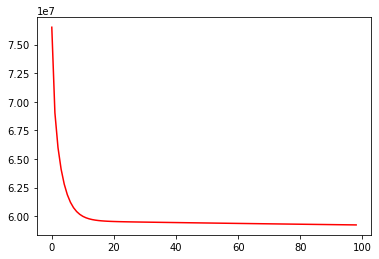

In [29]:
model.cost_list.pop(0)
model.draw_cost()

In [30]:
predictions

array([[38704.70517389],
       [31596.06354258],
       [34421.17250536],
       [35484.19380674],
       [31959.15055566],
       [34542.78049281],
       [34136.7910379 ],
       [30924.7074446 ],
       [37750.10953048],
       [31854.91332149],
       [33180.22636104],
       [36397.78028196],
       [13656.89579646],
       [29309.7091738 ],
       [27403.58046572],
       [36956.51915463],
       [33189.83317183],
       [36164.56285175],
       [38895.35964059],
       [19985.82184879],
       [36583.45006185],
       [37085.40976028],
       [29797.88017718],
       [15776.79572746],
       [22215.3358415 ],
       [34883.92720695],
       [20587.84969801],
       [12522.91856376],
       [37622.35935294],
       [32506.50029182],
       [ 9775.3751491 ],
       [31678.20824574],
       [22646.68220402],
       [16273.00371585],
       [33277.63703286],
       [34849.03805289],
       [21048.20396482],
       [18117.0123198 ],
       [16590.94521279],
       [35056.87999793],
